# Desafio: Montar um banco de dados a partir do arquivo csv de vendas fornecido pela empresa fakeProducts

* **Descrição**: A empresa armazena os dados referentes às suas vendas de produtos em um arquivo csv para fazer o controle. Como o porte da empresa cresceu, é necessário um meio mais eficaz de armazenamento dos dados. Desta forma, foi-me entregue o arquivo para aplicar a técnica de engenharia reversa em dados, assim, deve-se montar um esquema de banco de dados e transferir os dados do arquivo para este banco visando organizar as informações.

In [1]:
import pandas as pd 
import mysql.connector

In [2]:
df_vendas = pd.read_csv("tabela_vendas.csv")

# Processo de Engenharia Reversa

**Entendendo a base de vendas e aplicando o processo de ETL**

In [3]:
display(df_vendas)

,ID Venda,Data Venda,Produto,Quantidade,Total Venda,ID Cliente,Cliente,Email Cliente,Vendedor,Forma de Pagamento,ID Produto,Distribuidora,Preço Unitário,ID Vendedor,Email Vendedor
0,1,2023-09-20,Produto D,1,40.9,1,Cindy Parks,olsonchristopher@example.org,Vendedor 3,Cartão de Débito,4,Distribuidora 4,40.9,3,susan27@example.com
1,2,2023-10-23,Produto B,5,112.5,2,Steve Mcintosh,johnbrady@example.net,Vendedor 2,Cartão de Crédito,2,Distribuidora 2,22.5,2,gabriela96@example.org
2,3,2023-09-13,Produto A,5,79.5,3,Crystal Matthews,butlerlaura@example.com,Vendedor 4,Cartão de Crédito,1,Distribuidora 1,15.9,4,sgonzalez@example.org
3,4,2023-01-13,Produto B,1,22.5,4,Jessica Finley,penaandrea@example.org,Vendedor 3,Cartão de Débito,2,Distribuidora 2,22.5,3,susan27@example.com
4,5,2023-09-19,Produto A,3,47.7,5,Jessica Bryant,debra40@example.net,Vendedor 4,Boleto,1,Distribuidora 1,15.9,4,sgonzalez@example.org
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-10,Produto C,2,61.8,996,Jillian Holland,elizabeth23@example.com,Vendedor 4,Cartão de Débito,3,Distribuidora 3,30.9,4,sgonzalez@example.org
996,997,2023-08-01,Produto A,2,31.8,997,Tina Rivera,leah41@example.com,Vendedor 1,Boleto,1,Distribuidora 1,15.9,1,staceyweaver@example.org
997,998,2023-12-07,Produto A,5,79.5,998,Elizabeth Gallagher,darrellweber@example.org,Vendedor 1,Dinheiro,1,Distribuidora 1,15.9,1,staceyweaver@example.org
998,999,2023-06-13,Produto B,2,45.0,999,Allen Campbell,morrisdonna@example.net,Vendedor 3,Cartão de Crédito,2,Distribuidora 2,22.5,3,susan27@example.com


In [3]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID Venda            1000 non-null   int64  
 1   Data Venda          1000 non-null   object 
 2   Produto             1000 non-null   object 
 3   Quantidade          1000 non-null   int64  
 4   Total Venda         1000 non-null   float64
 5   ID Cliente          1000 non-null   int64  
 6   Cliente             1000 non-null   object 
 7   Email Cliente       1000 non-null   object 
 8   Vendedor            1000 non-null   object 
 9   Forma de Pagamento  1000 non-null   object 
 10  ID Produto          1000 non-null   int64  
 11  Distribuidora       1000 non-null   object 
 12  Preço Unitário      1000 non-null   float64
 13  ID Vendedor         1000 non-null   int64  
 14  Email Vendedor      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ 

In [4]:
df_vendas['Data Venda']= pd.to_datetime(df_vendas['Data Venda'])

df_vendas['Data Venda']

0     2023-09-20
1     2023-10-23
2     2023-09-13
3     2023-01-13
4     2023-09-19
         ...    
995   2023-05-10
996   2023-08-01
997   2023-12-07
998   2023-06-13
999   2023-08-15
Name: Data Venda, Length: 1000, dtype: datetime64[ns]

In [6]:
df_vendas.isnull().sum()

ID Venda              0
Data Venda            0
Produto               0
Quantidade            0
Total Venda           0
ID Cliente            0
Cliente               0
Email Cliente         0
Vendedor              0
Forma de Pagamento    0
ID Produto            0
Distribuidora         0
Preço Unitário        0
ID Vendedor           0
Email Vendedor        0
dtype: int64

**Diagrama Entidade de Relacionamento obtido a partir da base**

O banco de dados obtido está representado no diagrama abaixo. Nesta modelagem, o campo calculado "Total Venda" não será inserido como coluna armazenada no banco. Por norma, campos calculados não geram colunas nas tabelas, já que podem ser obtidos a qualquer momento.

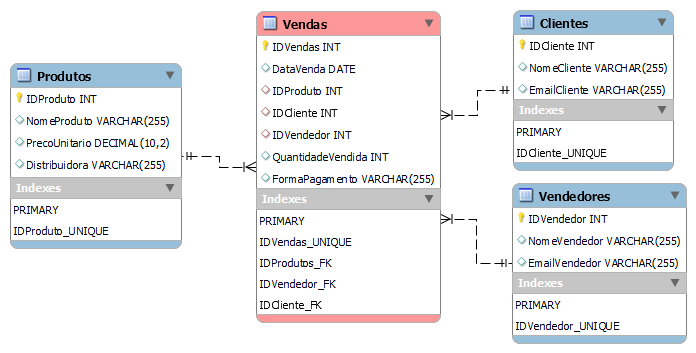

**Organizando a informação no formato das tabelas a serem construídas**

In [5]:
# Obtendo a Tabela de Produtos
df_produtos = df_vendas[['ID Produto', 'Produto', 'Preço Unitário', 'Distribuidora']]
df_produtos = df_produtos.drop_duplicates()
df_produtos = df_produtos.sort_values(by= 'ID Produto')
display(df_produtos)

,ID Produto,Produto,Preço Unitário,Distribuidora
2,1,Produto A,15.9,Distribuidora 1
1,2,Produto B,22.5,Distribuidora 2
6,3,Produto C,30.9,Distribuidora 3
0,4,Produto D,40.9,Distribuidora 4


In [6]:
# Obtendo a Tabela de Clientes
df_clientes = df_vendas[['ID Cliente', 'Cliente', 'Email Cliente']]
df_clientes= df_clientes.drop_duplicates()
df_clientes = df_clientes.sort_values(by='ID Cliente')
df_clientes

,ID Cliente,Cliente,Email Cliente
0,1,Cindy Parks,olsonchristopher@example.org
1,2,Steve Mcintosh,johnbrady@example.net
2,3,Crystal Matthews,butlerlaura@example.com
3,4,Jessica Finley,penaandrea@example.org
4,5,Jessica Bryant,debra40@example.net
...,...,...,...
995,996,Jillian Holland,elizabeth23@example.com
996,997,Tina Rivera,leah41@example.com
997,998,Elizabeth Gallagher,darrellweber@example.org
998,999,Allen Campbell,morrisdonna@example.net


In [7]:
# Obtendo a Tabela de Vendedores
df_vendedores= df_vendas[['ID Vendedor', 'Vendedor', 'Email Vendedor']]
df_vendedores= df_vendedores.drop_duplicates()
df_vendedores= df_vendedores.sort_values(by= 'ID Vendedor')
df_vendedores

,ID Vendedor,Vendedor,Email Vendedor
8,1,Vendedor 1,staceyweaver@example.org
1,2,Vendedor 2,gabriela96@example.org
0,3,Vendedor 3,susan27@example.com
2,4,Vendedor 4,sgonzalez@example.org


In [8]:
# Obtendo a Tabela de Vendas
df_vendas = df_vendas.drop(columns=['Total Venda','Produto', 'Preço Unitário', 'Distribuidora', 'Vendedor', 'Email Vendedor', 'Cliente', 'Email Cliente'], axis=1)
df_vendas = df_vendas.sort_values(by='ID Venda')
display(df_vendas)

,ID Venda,Data Venda,Quantidade,ID Cliente,Forma de Pagamento,ID Produto,ID Vendedor
0,1,2023-09-20,1,1,Cartão de Débito,4,3
1,2,2023-10-23,5,2,Cartão de Crédito,2,2
2,3,2023-09-13,5,3,Cartão de Crédito,1,4
3,4,2023-01-13,1,4,Cartão de Débito,2,3
4,5,2023-09-19,3,5,Boleto,1,4
...,...,...,...,...,...,...,...
995,996,2023-05-10,2,996,Cartão de Débito,3,4
996,997,2023-08-01,2,997,Boleto,1,1
997,998,2023-12-07,5,998,Dinheiro,1,1
998,999,2023-06-13,2,999,Cartão de Crédito,2,3


**Montagem do Banco de dados**
- Para esta construção será usado o SGBD MySQL;
- Como as chaves primárias das tabelas (campos começando por ID) são incrementais, as tabelas do banco de dados serão implementadas usando o auto incremento.
- As chaves estrangeiras na Tabela Vendas são inseridas juntamente com os outros campos, garantindo a integridade da tabela.

In [9]:
# Estabelecendo a conexão com o SGBD
try:
 conexao= mysql.connector.connect(
         host='localhost',
         user='root',
         password='meumysql67890',
 )
except:
    print('Erro ao conectar!')
 

In [10]:
# Instanciando um objeto para executar comandos SQL
cursor= conexao.cursor()

In [11]:
# Criando a base de dados e a habilitando 
cursor.execute('CREATE DATABASE IF NOT EXISTS BaseVendas')
cursor.execute('USE BaseVendas')

In [37]:
# Criando a Tabela Produtos
cursor.execute('''CREATE TABLE IF NOT EXISTS Produtos(
                 IDProduto INT AUTO_INCREMENT,
                 NomeProduto VARCHAR(255),
                 PrecoProduto DECIMAL(10,2),
                 Distribuidora VARCHAR(255),
                 PRIMARY KEY(IDProduto)
              ); ''')

# Inserindo os dados na Tabela Produtos
for indice,linha in df_produtos.iterrows():
      cursor.execute('''
                INSERT INTO Produtos (NomeProduto, PrecoProduto, Distribuidora)
                VALUES (%s,%s,%s)
                ''', (linha['Produto'], float(linha['Preço Unitário']), linha['Distribuidora']))
        
# Gravando as alterações
conexao.commit()     

In [35]:
# Criando a Tabela Clientes
cursor.execute('''CREATE TABLE IF NOT EXISTS Clientes(
                 IDCliente INT AUTO_INCREMENT,
                 NomeCliente VARCHAR(255),
                 EmailCliente VARCHAR(255),
                 PRIMARY KEY(IDCliente)
              ); ''')

# Inserindo os dados na Tabela Clientes
for indice,linha in df_clientes.iterrows():
       cursor.execute('''
                 INSERT INTO Clientes (NomeCliente, EmailCliente)
                 VALUES (%s,%s)
              ''', (linha['Cliente'], linha['Email Cliente']))
        
# Gravando as alterações
conexao.commit()

In [38]:
# Criando a Tabela Vendedores
cursor.execute('''CREATE TABLE IF NOT EXISTS Vendedores(
                 IDVendedor INT AUTO_INCREMENT,
                 NomeVendedor VARCHAR(255),
                 EmailVendedor VARCHAR(255),
                 PRIMARY KEY(IDVendedor)
              ); ''')

# Inserindo os dados na Tabela Vendedores
for indice,linha in df_vendedores.iterrows():
       cursor.execute('''
                 INSERT INTO Vendedores (NomeVendedor, EmailVendedor)
                 VALUES (%s,%s)
              ''', (linha['Vendedor'], linha['Email Vendedor']))
        
# Gravando as alterações
conexao.commit()

In [41]:
# Criando a Tabela Vendas
cursor.execute('''CREATE TABLE IF NOT EXISTS Vendas(
                 IDVenda INT AUTO_INCREMENT,
                 DataVenda DATE,
                 IDProduto INT,
                 IDCliente INT,
                 IDVendedor INT,
                 QuantidadeVendida INT,
                 FormaPagamento VARCHAR(255),
                 PRIMARY KEY(IDVenda),
                 FOREIGN KEY(IDProduto) REFERENCES Produtos(IDProduto),
                 FOREIGN KEY(IDCliente) REFERENCES Clientes(IDCliente),
                 FOREIGN KEY(IDVendedor) REFERENCES Vendedores(IDVendedor)   
              ); ''')

# Inserindo os dados na Tabela Vendas
for indice,linha in df_vendas.iterrows():
       cursor.execute('''
                 INSERT INTO Vendas (DataVenda, IDProduto, IDCliente, IDVendedor, QuantidadeVendida, FormaPagamento)
                 VALUES (%s,%s,%s,%s,%s,%s)
              ''', (linha['Data Venda'], int(linha['ID Produto']), int(linha['ID Cliente']), int(linha['ID Vendedor']), int(linha['Quantidade']), linha['Forma de Pagamento']))

# Gravando as alterações
conexao.commit()